In [1]:
import gadget
import FigureMove as Fig
import numpy as np
import auxiliary_functions as aux
import matplotlib.pyplot as plt
import matplotlib as mpl
import importlib
importlib.reload(Fig)
importlib.reload(aux)
importlib.reload(gadget)

[100, 150] [0.5, 0.5, 0.5] [1.0, 1.0, 1.0]


<module 'gadget' from '/home/kristian/analysis/arepo-snap-util/gadget.py'>

In [2]:
folder = '../../TestSim/R7E45X5M1ASFCMy15/'
snap = Fig.quickImport(10, folder=folder, lazy_load=0)

../../TestSim/R7E45X5M1ASFCMy15//snap_010.hdf5
generalInfo time:  50.4 Myr


Selected 13477 of 6474825 particles.
Plot range  [129.51254272460938, 906535.625]


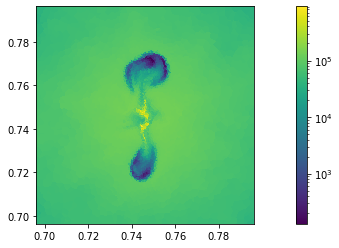

In [3]:
snap.plot_Aslice('rho', box=[0.1,0.1], colorbar=1, logplot=1, axes=[2,0]);

In [4]:
def oliverProj(snap, variable='rho', weight=None, proj_fact=0.01, axis=[2,0],
               box=[0.1,0.1], center=None, res=256, numthreads=16, bub_threshold=1e-3):
    print('working on oliver')
    if center is None:
        center = snap.center
    if weight is None:
        snap.data['weights'] = np.ones(np.size(snap.data['rho']), dtype='float64')
    else:
        snap.data['weights'] = snap.data[weight]
    snap.data['value_times_weights'] = snap.data[variable]*snap.data['weights']
    frame_data = snap.get_Aslice('value_times_weights', box=box, center=center, res=res, 
                                 numthreads=numthreads, proj_fact=proj_fact, axes=axis, proj=1)    
    frame_weights = snap.get_Aslice('weights', box=box, center=center, res=res, 
                                    numthreads=numthreads, proj_fact=proj_fact, axes=axis, proj=1)    
    frame_data['grid'] = frame_data['grid']/frame_weights['grid']
    frame = frame_data
#     if variable == 'PassiveScalar0':
#         for i,z in enumerate(frame['grid'].T):
#             z[np.isclose(z, 0.0, atol=1e-6)] = bub_threshold
#             frame['grid'].T[i] = z
    print('finished oliver')
    return frame

In [5]:
snap.data['type']

array([0, 0, 0, ..., 0, 0, 5], dtype=int8)

In [6]:
import copy

In [7]:
box = [0.1,0.3]
proj_fact = 0.1
axis = [1,0]
ProjBox = copy.copy(box)
ProjBox.insert(3-sum(axis),max(box)*proj_fact*2)
res = 80
# res = [int(res*(x/max(box))) for x in box]
resProj = aux.resolution_calculator_projections(res,ProjBox)
print(ProjBox)
print(res, resProj)
INFO = {'NScalar':0}
variable = 'Density'
weight = None
if variable not in snap.data.keys():
    snap.data[variable] = aux.get_value(variable,snap,INFO=INFO)
    snap.data[variable][snap.data[variable]<=0]=np.min(snap.data[variable][snap.data[variable]>0])
if weight not in snap.data.keys() and weight is not None:
    snap.data[weight] = Fig.getWeights(snap, weight) 
numthreads = 16
center = snap.center
ext = Fig.getExtension(ProjBox, center, axis)
np.min(snap.data[variable][snap.data[variable]>0])

[0.1, 0.3, 0.06]
80 [26 80 16]
Density


4.9439756e-29

In [8]:

frameProj = Fig.do_Projection(snap, variable, WEIGHTS=weight, res=resProj, ProjBox=ProjBox, center=None, 
                              numthreads=numthreads, axis=axis, inputGrids=False, sumAlongAxis=False,
                                INFO=None, resCritical=1024, verbose=1, reimportStrVar=False)
frameOliv = oliverProj(snap, variable=variable, weight=weight, proj_fact=proj_fact, axis=axis,
               box=box, center=None, res=res, numthreads=numthreads, bub_threshold=1e-3)


Selected 150638 of 6474825 particles.
do_projection: takin mean of data in projection
working on oliver
Selected 150832 of 6474825 particles.
nz= 16 zdist=0.03, boxx=0.100000, boxy=0.3
Total is  1.060602245055866e-23
Selected 150832 of 6474825 particles.
nz= 16 zdist=0.03, boxx=0.100000, boxy=0.3
Total is  384.0
finished oliver


In [9]:
vmin = 1e-38
vmax = 1e20
vmin = vmax = None

In [15]:
yy = np.linspace(ext[2], ext[3], np.shape(frameProj)[0]+1)
xx = np.linspace(ext[0], ext[1], np.shape(frameProj)[1]+1)


In [21]:
s = np.array([1,2,3,4])
s=s.reshape(2,2)
s

array([[1, 2],
       [3, 4]])

In [17]:
frameOliv['x']

array([0.69626866, 0.69751866, 0.69876866, 0.70001866, 0.70126866,
       0.70251866, 0.70376866, 0.70501866, 0.70626866, 0.70751866,
       0.70876866, 0.71001866, 0.71126866, 0.71251866, 0.71376866,
       0.71501866, 0.71626866, 0.71751866, 0.71876866, 0.72001866,
       0.72126866, 0.72251866, 0.72376866, 0.72501866, 0.72626866,
       0.72751866, 0.72876866, 0.73001866, 0.73126866, 0.73251866,
       0.73376866, 0.73501866, 0.73626866, 0.73751866, 0.73876866,
       0.74001866, 0.74126866, 0.74251866, 0.74376866, 0.74501866,
       0.74626866, 0.74751866, 0.74876866, 0.75001866, 0.75126866,
       0.75251866, 0.75376866, 0.75501866, 0.75626866, 0.75751866,
       0.75876866, 0.76001866, 0.76126866, 0.76251866, 0.76376866,
       0.76501866, 0.76626866, 0.76751866, 0.76876866, 0.77001866,
       0.77126866, 0.77251866, 0.77376866, 0.77501866, 0.77626866,
       0.77751866, 0.77876866, 0.78001866, 0.78126866, 0.78251866,
       0.78376866, 0.78501866, 0.78626866, 0.78751866, 0.78876

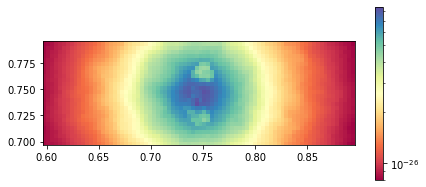

In [19]:
fig = plt.figure(figsize=(7,7))

# ax = fig.add_subplot(1,2,1)# adjustable='box', aspect=np.shape(frameProj)[1]/np.shape(frameProj)[0])
# img = ax.pcolormesh(frameOliv['x'], frameOliv['y'], frameOliv['grid'].T, antialiased=False, edgecolors='none', shading='flat', rasterized=False, norm=mpl.colors.LogNorm(vmin=vmin,vmax=vmax), cmap='Spectral')
# ax.set_aspect('equal', 'datalim')
# ax.axis('scaled')
# plt.colorbar(img)

ax = fig.add_subplot(2,1,2)# adjustable='box', aspect=np.shape(frameProj)[1]/np.shape(frameProj)[0])
# ax.set_aspect(0.3)
img = ax.pcolormesh(xx,yy,frameProj, antialiased=False, edgecolors='none', shading='flat', rasterized=False, norm=mpl.colors.LogNorm(vmin=vmin,vmax=vmax), cmap='Spectral')
ax.axis('scaled')
plt.colorbar(img)
# ax.set_aspect('equal', 'datalim')

# ax = fig.add_subplot(2,2,2)
# img = ax.imshow(frameProj, cmap='Spectral', origin="lower", interpolation='none', aspect='auto', extent=ext, norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax))
# plt.colorbar(img)

# ax = fig.add_subplot(2,2,4)
# img = ax.imshow(frameProj, cmap='Spectral', origin="lower", interpolation='none', aspect='auto', extent=ext, norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax))
# plt.colorbar(img)




